In [1]:
import numpy as np 
import random   
import math 

#Energy0=100 #Mev 
#voltage= 0.0013 #Mev/cm
#distance0=100000 #cm 
def MonteCarlo(Energy0,voltage,distance0,dt):# [Energy]=Mv,[Voltage]=(e-)*Mv/cm=Mv/cm,[distance0]=cm,[dt]=cm
    hamma0=Energy0/0.511 
    teta0=0.1661*(dt**0.5)/hamma0 
    fi=random.uniform(0, 2*math.pi) 

    v1=[math.sin(teta0)*math.cos(fi),math.sin(teta0)*math.sin(fi),math.cos(teta0)] #если в нашу формулу подставить v0
                                                                                   #вект. произв обнуляется 
    teta=teta0 
    hamma=hamma0 
    distance=distance0
    v=v1 
    Eneg=0.0022*dt 
    while True: 
        Epos=voltage*dt*np.dot([0,0,1],v) 
        
        deltaE=(Epos-Eneg)/(0.511) 
        hamma=hamma+deltaE   
        distance=distance-dt*np.dot([0,0,1],v) 
        if hamma<1: 
            s=0   
            break 

        if distance<0: 
            s=1 
            
            break 
        teta=0.1661*(dt**0.5)/hamma 
        fi=random.uniform(0, 2*math.pi) 
        h=[math.sin(teta)*math.cos(fi),math.sin(teta)*math.sin(fi),math.cos(teta)]  
        e3=v 
        e1=np.cross([0,0,1],e3) 
        e1=np.dot(1/((np.dot(e1, e1))**0.5), e1) 
        e2=np.cross(e1,e3) 
        e2=np.dot(1/((np.dot(e2, e2))**0.5), e2) 
        a=[e1,e2,e3]
        v=np.dot(h,a)   
        
        
    
    return(s)
  
            

In [2]:
Energy0=100 #Mev 
voltage= 0.0012#Mev/cm
distance0=100000 #cm  
dt=10 #cm   
def Probab(number): 
    success=0 
    failure=0 
    for i in range(0,number): 
        if MonteCarlo(Energy0,voltage,distance0,dt)==1 : 
            success+=1 
    return(success/number)   
print(Probab(10))

0.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
def Graf(x,y): 
    fig, ax = plt.subplots() 
    ax.plot(y, x, 'ro', markersize=5)
    
    
    
    #  Устанавливаем интервал основных делений:
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    #ax.xaxis.set_minor_locator(ticker.MultipleLocator(20))
    
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
    #ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
    #  Устанавливаем интервал вспомогательных делений:
    #ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

    #  Тоже самое проделываем с делениями на оси "y":
    #ay.yaxis.set_major_locator(ticker.MultipleLocator(50))
    #ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
    
    #пределы x,y 
    #plt.xlim(0,900)  
    #fig.set_figwidth(30)
    #fig.set_figheight(4.5)
    ax.plot(y, x, color = 'r', linewidth = 3)
    ax.minorticks_on()
    ax.grid(which='major',color = 'k') #сутка
    # ax.grid(which='minor', color = 'gray',linestyle = ':')
    #plt.xlim([0, 1500])
    #plt.ylim([0,1])
    plt.show()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006, 0.0022, 0.0021, 0.0068, 0.0085, 0.0129, 0.0195, 0.0258, 0.0327, 0.0442, 0.0582, 0.0721]
[2.5500000000000003, 2.6000000000000005, 2.6500000000000004, 2.7000000000000006, 2.750000000000001, 2.8000000000000007, 2.850000000000001, 2.9000000000000012, 2.950000000000001, 3.0000000000000013, 3.0500000000000016, 3.1000000000000014, 3.1500000000000017, 3.200000000000002, 3.250000000000002, 3.300000000000002, 3.3500000000000023, 3.4000000000000026, 3.4500000000000024, 3.5000000000000027]


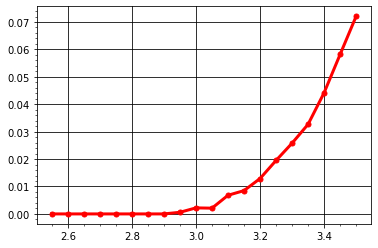

In [4]:
Energy0=2 
voltage=0.0025 
distance0=100000 
dt=10 
volt=[] 
prob=[] 
for i in range(20): 
    voltage+=0.00005 
    volt+=[voltage] 
    prob+=[Probab(10000)]
print(prob) 
for i in range(len(volt)): 
    volt[i]*=1000
print(volt) 
Graf(prob,volt)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.01, 0.04, 0.12, 0.07, 0.16, 0.25, 0.21, 0.33, 0.34, 0.36, 0.52, 0.49, 0.59, 0.61, 0.68, 0.62, 0.61, 0.69, 0.69, 0.74, 0.74, 0.77, 0.83, 0.8, 0.86]
[1.6, 1.7000000000000002, 1.8000000000000003, 1.9000000000000001, 2.0, 2.1, 2.1999999999999997, 2.2999999999999994, 2.3999999999999995, 2.499999999999999, 2.599999999999999, 2.699999999999999, 2.7999999999999985, 2.8999999999999986, 2.9999999999999982, 3.0999999999999983, 3.199999999999998, 3.2999999999999976, 3.3999999999999977, 3.4999999999999973, 3.5999999999999974, 3.699999999999997, 3.799999999999997, 3.899999999999997, 3.9999999999999964, 4.099999999999997, 4.1999999999999975, 4.299999999999997, 4.399999999999998, 4.499999999999998, 4.599999999999998, 4.699999999999998, 4.799999999999999, 4.899999999999999, 4.999999999999999, 5.1, 5.2, 5.3, 5.4, 5.500000000000001]


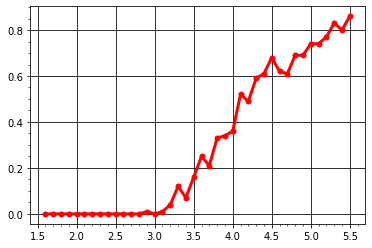

In [123]:
Energy0=3 
voltage=0.0015 
distance0=100000 
dt=10 
volt=[] 
prob=[] 
for i in range(40): 
    voltage+=0.0001 
    volt+=[voltage] 
    prob+=[Probab(100)]
print(prob) 
for i in range(len(volt)): 
    volt[i]*=1000
print(volt) 
Graf(prob,volt)
    

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.02, 0.03, 0.14, 0.2, 0.27, 0.31, 0.34, 0.41, 0.46, 0.49, 0.6, 0.59, 0.65, 0.63, 0.73, 0.68, 0.68, 0.81, 0.77, 0.69, 0.76, 0.77, 0.92, 0.89, 0.83, 0.83]
[1.6, 1.7000000000000002, 1.8000000000000003, 1.9000000000000001, 2.0, 2.1, 2.1999999999999997, 2.2999999999999994, 2.3999999999999995, 2.499999999999999, 2.599999999999999, 2.699999999999999, 2.7999999999999985, 2.8999999999999986, 2.9999999999999982, 3.0999999999999983, 3.199999999999998, 3.2999999999999976, 3.3999999999999977, 3.4999999999999973, 3.5999999999999974, 3.699999999999997, 3.799999999999997, 3.899999999999997, 3.9999999999999964, 4.099999999999997, 4.1999999999999975, 4.299999999999997, 4.399999999999998, 4.499999999999998, 4.599999999999998, 4.699999999999998, 4.799999999999999, 4.899999999999999, 4.999999999999999, 5.1, 5.2, 5.3, 5.4, 5.500000000000001]


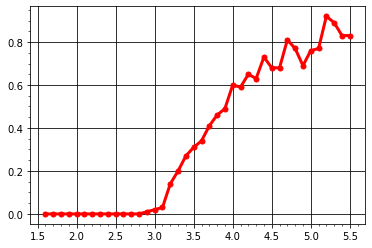

In [124]:
Energy0=4 
voltage=0.0015 
distance0=100000 
dt=10 
volt=[] 
prob=[] 
for i in range(40): 
    voltage+=0.0001 
    volt+=[voltage] 
    prob+=[Probab(100)]
print(prob) 
for i in range(len(volt)): 
    volt[i]*=1000
print(volt) 
Graf(prob,volt)
    

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.08, 0.13, 0.16, 0.2, 0.32, 0.39, 0.44, 0.61, 0.56, 0.55, 0.57, 0.65, 0.7, 0.76, 0.78, 0.85, 0.78, 0.84, 0.82, 0.84, 0.87, 0.93, 0.9, 0.85, 0.91, 0.89, 0.95]
[1.6, 1.7000000000000002, 1.8000000000000003, 1.9000000000000001, 2.0, 2.1, 2.1999999999999997, 2.2999999999999994, 2.3999999999999995, 2.499999999999999, 2.599999999999999, 2.699999999999999, 2.7999999999999985, 2.8999999999999986, 2.9999999999999982, 3.0999999999999983, 3.199999999999998, 3.2999999999999976, 3.3999999999999977, 3.4999999999999973, 3.5999999999999974, 3.699999999999997, 3.799999999999997, 3.899999999999997, 3.9999999999999964, 4.099999999999997, 4.1999999999999975, 4.299999999999997, 4.399999999999998, 4.499999999999998, 4.599999999999998, 4.699999999999998, 4.799999999999999, 4.899999999999999, 4.999999999999999, 5.1, 5.2, 5.3, 5.4, 5.500000000000001]


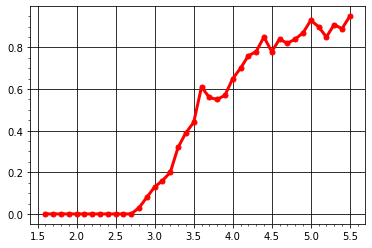

In [125]:

Energy0=5
voltage=0.0015 
distance0=100000 
dt=10 
volt=[] 
prob=[] 
for i in range(40): 
    voltage+=0.0001 
    volt+=[voltage] 
    prob+=[Probab(100)]
print(prob) 
for i in range(len(volt)): 
    volt[i]*=1000
print(volt) 
Graf(prob,volt)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.02, 0.06, 0.15, 0.17, 0.26, 0.42, 0.36, 0.44, 0.48, 0.58, 0.59, 0.69, 0.69, 0.64, 0.8, 0.84, 0.75, 0.86, 0.89, 0.88, 0.84, 0.92, 0.91, 0.86, 0.94, 0.93, 0.96, 0.98, 0.98]
[1.6, 1.7000000000000002, 1.8000000000000003, 1.9000000000000001, 2.0, 2.1, 2.1999999999999997, 2.2999999999999994, 2.3999999999999995, 2.499999999999999, 2.599999999999999, 2.699999999999999, 2.7999999999999985, 2.8999999999999986, 2.9999999999999982, 3.0999999999999983, 3.199999999999998, 3.2999999999999976, 3.3999999999999977, 3.4999999999999973, 3.5999999999999974, 3.699999999999997, 3.799999999999997, 3.899999999999997, 3.9999999999999964, 4.099999999999997, 4.1999999999999975, 4.299999999999997, 4.399999999999998, 4.499999999999998, 4.599999999999998, 4.699999999999998, 4.799999999999999, 4.899999999999999, 4.999999999999999, 5.1, 5.2, 5.3, 5.4, 5.500000000000001]


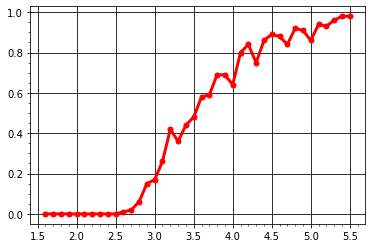

In [126]:
Energy0=6 
voltage=0.0015 
distance0=100000 
dt=10 
volt=[] 
prob=[] 
for i in range(40): 
    voltage+=0.0001 
    volt+=[voltage] 
    prob+=[Probab(100)]
print(prob) 
for i in range(len(volt)): 
    volt[i]*=1000
print(volt) 
Graf(prob,volt)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.07, 0.18, 0.24, 0.37, 0.4, 0.44, 0.5, 0.63, 0.64, 0.64, 0.74, 0.82, 0.82, 0.84, 0.89, 0.9, 0.89, 0.9, 0.87, 0.94, 0.95, 0.97, 0.89, 0.93, 0.95, 0.97, 0.95, 0.98]
[1.6, 1.7000000000000002, 1.8000000000000003, 1.9000000000000001, 2.0, 2.1, 2.1999999999999997, 2.2999999999999994, 2.3999999999999995, 2.499999999999999, 2.599999999999999, 2.699999999999999, 2.7999999999999985, 2.8999999999999986, 2.9999999999999982, 3.0999999999999983, 3.199999999999998, 3.2999999999999976, 3.3999999999999977, 3.4999999999999973, 3.5999999999999974, 3.699999999999997, 3.799999999999997, 3.899999999999997, 3.9999999999999964, 4.099999999999997, 4.1999999999999975, 4.299999999999997, 4.399999999999998, 4.499999999999998, 4.599999999999998, 4.699999999999998, 4.799999999999999, 4.899999999999999, 4.999999999999999, 5.1, 5.2, 5.3, 5.4, 5.500000000000001]


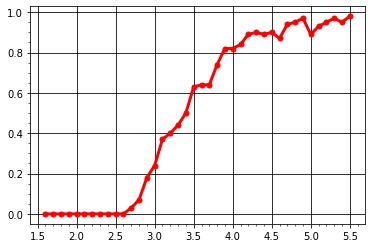

In [127]:
Energy0=7 
voltage=0.0015 
distance0=100000 
dt=10 
volt=[] 
prob=[] 
for i in range(40): 
    voltage+=0.0001 
    volt+=[voltage] 
    prob+=[Probab(100)]
print(prob) 
for i in range(len(volt)): 
    volt[i]*=1000
print(volt) 
Graf(prob,volt)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.08, 0.19, 0.27, 0.31, 0.4, 0.45, 0.52, 0.66, 0.6, 0.73, 0.74, 0.77, 0.75, 0.81, 0.78, 0.89, 0.93, 0.95, 0.92, 0.96, 0.94, 0.98, 0.96, 0.97, 0.98, 0.95, 0.99, 1.0, 0.98]
[1.6, 1.7000000000000002, 1.8000000000000003, 1.9000000000000001, 2.0, 2.1, 2.1999999999999997, 2.2999999999999994, 2.3999999999999995, 2.499999999999999, 2.599999999999999, 2.699999999999999, 2.7999999999999985, 2.8999999999999986, 2.9999999999999982, 3.0999999999999983, 3.199999999999998, 3.2999999999999976, 3.3999999999999977, 3.4999999999999973, 3.5999999999999974, 3.699999999999997, 3.799999999999997, 3.899999999999997, 3.9999999999999964, 4.099999999999997, 4.1999999999999975, 4.299999999999997, 4.399999999999998, 4.499999999999998, 4.599999999999998, 4.699999999999998, 4.799999999999999, 4.899999999999999, 4.999999999999999, 5.1, 5.2, 5.3, 5.4, 5.500000000000001]


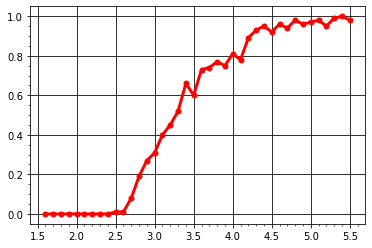

In [128]:
Energy0=8 
voltage=0.0015 
distance0=100000 
dt=10 
volt=[] 
prob=[] 
for i in range(40): 
    voltage+=0.0001 
    volt+=[voltage] 
    prob+=[Probab(100)]
print(prob) 
for i in range(len(volt)): 
    volt[i]*=1000
print(volt) 
Graf(prob,volt)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.03, 0.11, 0.21, 0.24, 0.38, 0.42, 0.53, 0.62, 0.59, 0.77, 0.76, 0.73, 0.84, 0.85, 0.84, 0.89, 0.91, 0.91, 0.94, 0.97, 0.95, 0.94, 0.95, 0.96, 0.99, 0.96, 0.99, 1.0, 0.99, 0.99]
[1.6, 1.7000000000000002, 1.8000000000000003, 1.9000000000000001, 2.0, 2.1, 2.1999999999999997, 2.2999999999999994, 2.3999999999999995, 2.499999999999999, 2.599999999999999, 2.699999999999999, 2.7999999999999985, 2.8999999999999986, 2.9999999999999982, 3.0999999999999983, 3.199999999999998, 3.2999999999999976, 3.3999999999999977, 3.4999999999999973, 3.5999999999999974, 3.699999999999997, 3.799999999999997, 3.899999999999997, 3.9999999999999964, 4.099999999999997, 4.1999999999999975, 4.299999999999997, 4.399999999999998, 4.499999999999998, 4.599999999999998, 4.699999999999998, 4.799999999999999, 4.899999999999999, 4.999999999999999, 5.1, 5.2, 5.3, 5.4, 5.500000000000001]


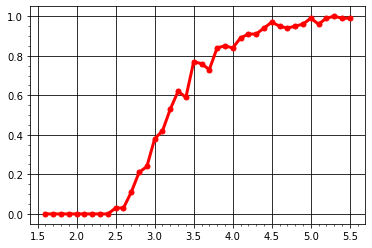

In [129]:
Energy0=9 
voltage=0.0015 
distance0=100000 
dt=10 
volt=[] 
prob=[] 
for i in range(40): 
    voltage+=0.0001 
    volt+=[voltage] 
    prob+=[Probab(100)]
print(prob) 
for i in range(len(volt)): 
    volt[i]*=1000
print(volt) 
Graf(prob,volt)

[0.14, 0.66, 0.96, 0.96, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.3, 1.4, 1.5, 1.6, 1.7000000000000002, 1.8000000000000003, 1.9000000000000001, 2.0, 2.1, 2.1999999999999997, 2.2999999999999994, 2.3999999999999995, 2.499999999999999, 2.599999999999999, 2.699999999999999, 2.7999999999999985, 2.8999999999999986, 2.9999999999999982, 3.0999999999999983, 3.199999999999998, 3.2999999999999976, 3.3999999999999977, 3.4999999999999973, 3.5999999999999974, 3.699999999999997, 3.799999999999997, 3.899999999999997, 3.9999999999999964, 4.099999999999997, 4.1999999999999975, 4.299999999999997, 4.399999999999998, 4.499999999999998, 4.599999999999998, 4.699999999999998, 4.799999999999999, 4.899999999999999, 4.999999999999999, 5.1, 5.2]


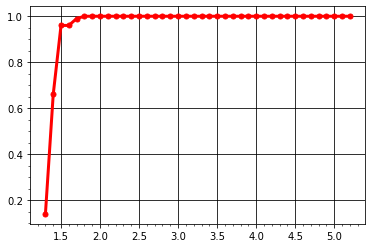

In [130]:
Energy0=100 
voltage=0.0012 
distance0=100000 
dt=10 
volt=[] 
prob=[] 
for i in range(40): 
    voltage+=0.0001 
    volt+=[voltage] 
    prob+=[Probab(100)]
print(prob) 
for i in range(len(volt)): 
    volt[i]*=1000
print(volt) 
Graf(prob,volt)

In [ ]:
#2 mv

In [131]:
x=[2.1, 2.1999999999999997, 2.2999999999999994, 2.3999999999999995, 2.499999999999999, 2.599999999999999, 2.699999999999999, 2.7999999999999985, 2.8999999999999986, 2.9999999999999982, 3.0999999999999983, 3.199999999999998, 3.2999999999999976, 3.3999999999999977, 3.4999999999999973, 3.5999999999999974, 3.699999999999997, 3.799999999999997, 3.899999999999997, 3.9999999999999964, 4.099999999999997, 4.1999999999999975, 4.299999999999997, 4.399999999999998, 4.499999999999998, 4.599999999999998, 4.699999999999998, 4.799999999999999, 4.899999999999999, 4.999999999999999] 
y=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.03, 0.05, 0.06, 0.17, 0.13, 0.19, 0.21, 0.28, 0.26, 0.32, 0.28, 0.39, 0.34, 0.37, 0.5, 0.44, 0.55, 0.48]

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
def Graf2(x,y): 
    fig, ax = plt.subplots() 
    ax.plot(y, x, 'ro', markersize=5) 
    ay.plot(y, x, 'ro', markersize=5)
    
    
    
    #  Устанавливаем интервал основных делений:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    #ax.xaxis.set_minor_locator(ticker.MultipleLocator(20))
    
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
    #ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
    #  Устанавливаем интервал вспомогательных делений:
    #ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

    #  Тоже самое проделываем с делениями на оси "y":
    ay.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    #ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
    
    #пределы x,y 
    #plt.xlim(0,900)  
    fig.set_figwidth(12)
    fig.set_figheight(10)
    ax.plot(y, x, color = 'r', linewidth = 3)
    ax.minorticks_on()
    ax.grid(which='major',color = 'k') #сутка
    # ax.grid(which='minor', color = 'gray',linestyle = ':')
    #plt.xlim([0, 1500])
    plt.ylim([0,1])
    plt.show()

NameError: name 'ay' is not defined

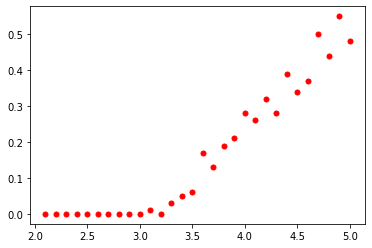

In [150]:
Graf2(y,x)